In [12]:
# load your software stack
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

               data
count  1.000000e+07
mean   1.637918e+04
std    9.460433e+03
min    0.000000e+00
25%    8.186000e+03
50%    1.637500e+04
75%    2.457900e+04
max    3.276700e+04


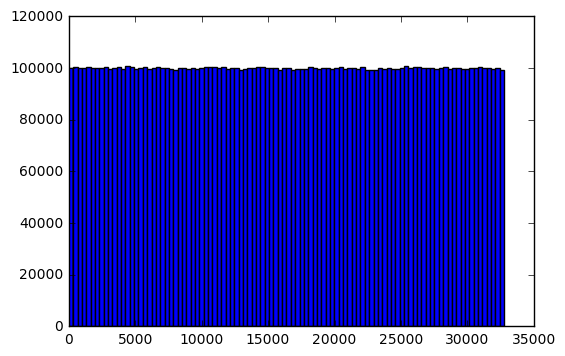

In [13]:
# read the data in, describe it, and plot a histogram of the data 
# the data are integers 
mypop=pd.read_csv('mypopulation.dat',names=['data'])
print (mypop.describe())
plt.hist(mypop.data,bins=100,normed=False);

### This data is the so-called "uniform distribution" 

1) What is the probability of drawing the number 5000?  
2) How much of the range is covered by the standard deviation?  
3) The uniform distribution has a standard deviation of: $\sigma = \sqrt{\frac{(MAX-MIN)^2}{12}}$ , how close is our data to this value?  
4) The analytical answer to question 3 is: $\frac{1}{\sqrt{12}}$?  

In [14]:
print (1.0/(mypop.data.max()-mypop.data.min()))
print ""
print (mypop.data.std()/(mypop.data.max()-mypop.data.min()))
print ""
print (np.sqrt(np.power(mypop.data.max(),2)/12))
print (mypop.data.std())
print ""
print (1/np.sqrt(12))

# if you get an error output of this cell - it may be your Python is not compatible with: print ""

3.0518509476e-05

0.288718308682

9459.01813086
9460.43282059

0.288675134595


### A "real world" scenario

* You are conducting experiments that measure data. The data are a _sample_ that come from the _population_ represented in the array `mypop.data`
* Your goal is to estimate properties of the _population_ by taking _samples_ , you will start by estimating the population mean 
* You can control the sample `size`, i.e., how many points you collect in a given experiment 
* You can also control the number of experiments `samples`, i.e., how many experiments you conduct 

### To do: 
* Change the size and # samples and study the output and look for any trends.  
    * Before you go crazy, I suggest being systematic, changing 1 variable at a time 
    * I also suggest you don't exceed a 1,0000,000 as the product of the `size x samples`
* Be exploratory - look for trends and try and understand what is happening 
    * If you want to see multiple `trials` just hit shift-enter and re-execute the same cell 

### Before you run the next cell, please take a moment to make a prediction about what will happen! 

#### Big picture: you are randomly sampling a set of 10,000,000 uniform random integers. What do you expect the distribution of sample means to look like? 

#### My prediction is:  << fill here >>



data    2.831124
dtype: float64
data    0.000173
dtype: float64


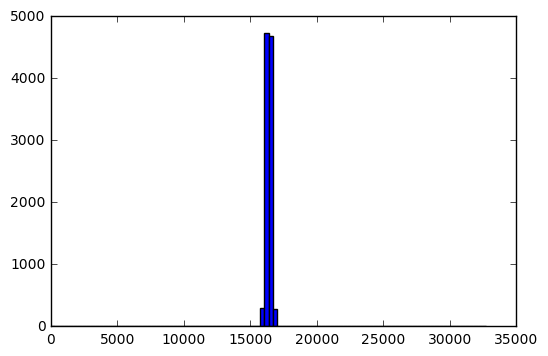

In [18]:
#you can control these

#how many data points you collect in each experiment
size=3000
# how many experiments will you run 
samples=10000

#analysis of your data - you can ignore for now but what is happening is commented below

# initalize a vector of zeros that is of length of your # of samples
means=np.zeros(samples)

# iterate over the vector (currently all zeros), iterate in a way that 
# makes each element writeable (this is not standard but convenient for our purpose)
# the total number of iterations is the total number of samples (experiments) performed
for x in np.nditer(means, op_flags=['readwrite']):
    #take your data: this means you are randomly sampling the global population taking `size` points
    data2=np.random.choice(mypop.data,size=size)
    # update item x (this the ith experiment) with the sample mean
    x[...]=np.mean(data2)
    
#plot the histogram of your experiments 
plt.hist(means,range=[mypop.data.min(),mypop.data.max()],bins=100)

#print the absolute differnece between the population mean (mu) and average of all your experimental data (xbar)
print np.abs(mypop.mean()-means.mean())
#print the relative diff (mu-xbar)/mu
print np.abs((mypop.mean()-means.mean()))/mypop.mean()